## Share Generation

In [7]:
N= 100
PRIME = 340282366920938463463374607431768211507  # This is 2^128 - 159, and is prime

In [8]:
import random

def generate_shares(username_key, t, n, prime=PRIME):
     
     username, key = list(username_key.items())[0]

     # Generate random polynomial coefficients
     coeffs = [key] + [random.randint(0, prime - 1) for _ in range(t - 1)]

     def f(x):
          return sum(c * pow(x, i, prime) for i, c in enumerate(coeffs)) % prime

     shares = [{username: (i, f(i))} for i in range(1, n + 1)]
     return shares


## Reconstruction

In [9]:
def reconstruct_secret(shares, threshold, prime=PRIME):
    points = [list(s.values())[0] for s in shares[:threshold]]  # Get (x, y) tuples

    def lagrange(x, x_s, y_s):
        total = 0
        for i in range(len(x_s)):
            xi, yi = x_s[i], y_s[i]
            prod = 1
            for j in range(len(x_s)):
                if i != j:
                    xj = x_s[j]
                    prod *= (x - xj) * pow(xi - xj, -1, prime)
                    prod %= prime
            total += yi * prod
            total %= prime
        return total

    x_s, y_s = zip(*points)
    return lagrange(0, x_s, y_s)


## Generating and Reconstructing Keys for different values of T and measeuring and storing the time for each cycle

In [10]:
user_dict = {"Pushan":2889992661}
threshold_latency = []

In [11]:
import time
for t_value in range(1,N+1):
     all_shares = generate_shares(user_dict, t_value, N)
     
     start = time.perf_counter()
     key = reconstruct_secret(all_shares, t_value)
     end = time.perf_counter()
     
     latency_ms = (end - start) * 1000

     threshold_latency.append((t_value, latency_ms))

print(threshold_latency)

[(1, 0.01939999998512576), (2, 0.03150000003415698), (3, 0.048300000003109744), (4, 0.07329999999683423), (5, 0.12379999998302083), (6, 0.17480000002478846), (7, 0.23690000000442524), (8, 0.2423000000248976), (9, 0.34690000001091903), (10, 0.5108999999947628), (11, 0.632299999949737), (12, 0.32490000000962027), (13, 0.3290999999876476), (14, 0.2934999999979482), (15, 0.42220000000270375), (16, 0.47660000001314984), (17, 0.5547000000092339), (18, 1.5373000000522552), (19, 1.0455999999976484), (20, 1.0353000000122847), (21, 0.8584999999925458), (22, 1.8844999999600986), (23, 1.3482999999610001), (24, 1.5252999999688654), (25, 2.556299999980638), (26, 1.6669999999976426), (27, 2.1911000000045533), (28, 1.8158000000312313), (29, 8.163499999966461), (30, 2.010500000039883), (31, 2.2864999999683278), (32, 1.890400000036152), (33, 4.067099999986112), (34, 2.777700000024197), (35, 5.0985999999966225), (36, 2.3742999999853964), (37, 4.711299999996754), (38, 3.6206000000333916), (39, 2.740599999

## Plotting

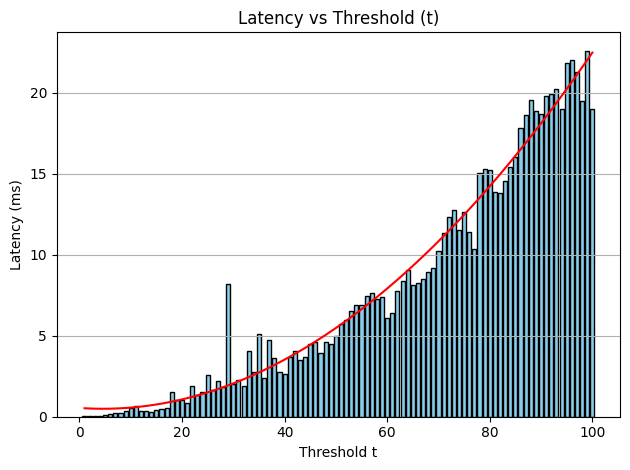

In [12]:
import matplotlib.pyplot as plt
import numpy as np

ts = [t for t, _ in threshold_latency]
latencies = [lat for _, lat in threshold_latency]

plt.bar(ts, latencies, color='skyblue', edgecolor='black')
plt.title("Latency vs Threshold (t)")
plt.xlabel("Threshold t")
plt.ylabel("Latency (ms)")
plt.grid(axis='y')
plt.tight_layout()

z = np.polyfit(ts, latencies, deg=2)
p = np.poly1d(z)
smooth_x = np.linspace(min(ts), max(ts), 300)
plt.plot(smooth_x, p(smooth_x), color='red', label='Fitted curve (deg=2)')

plt.show()
